In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xg
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone

import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Khai phá dữ liệu/data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
data.duplicated().sum()

1

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


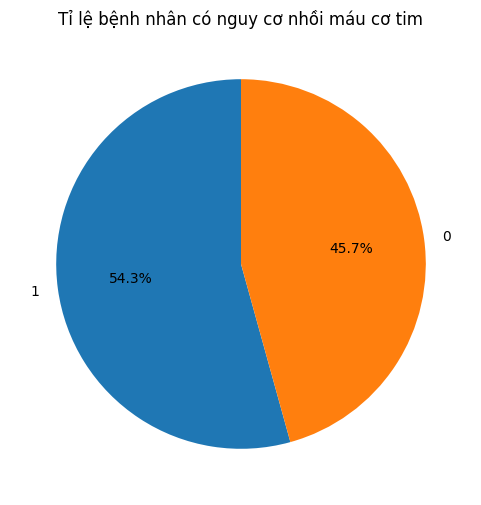

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(data.target.value_counts(), labels = data.target.value_counts().index, autopct='%1.1f%%', startangle = 90)
plt.title("Tỉ lệ bệnh nhân có nguy cơ nhồi máu cơ tim")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
!pip install shap
import shap #for SHAP values
!pip install pdpbox
from pdpbox import pdp, info_plots #for partial plots
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=378ae9999ba8b340ee230a18d9a470a0af2b71cb37891dd6577a3a9003261fe6
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 11.4 MB/s eta 0:00:00


ĐỔI TÊN

In [ ]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

THAY ĐỔI CÁC GIÁ TRỊ ĐỂ RÕ RÀNG TRÊN HIỂN THỊ

In [ ]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [ ]:
data.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [ ]:
# Chuyển các cột sang kiểu dữ liệu object
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

In [ ]:
data.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

Tạo các biến ảo (dummy variables) từ các biến phân loại (categorical variables) có thể có nhiều ứng dụng trong phân tích dữ liệu và mô hình hóa. Dưới đây là một số mục đích chính của việc tạo biến ảo:

Chuẩn bị dữ liệu cho mô hình hóa: Một số mô hình học máy và thống kê yêu cầu dữ liệu đầu vào là dạng số hoặc số học. Tạo biến ảo từ các biến phân loại giúp chuyển đổi thông tin không số học thành dạng số hóa, cho phép áp dụng các mô hình phân tích và dự đoán.

Loại bỏ cạm bẫy biến giả: Khi mô hình hóa dữ liệu với các biến giả, việc tạo các biến ảo sẽ giúp tránh hiện tượng "dummy variable trap". Cạm bẫy biến giả xảy ra khi có một tương quan tuyến tính hoàn hảo giữa các biến giả, dẫn đến việc mô hình không thể ước lượng được hiệu quả. Bằng cách loại bỏ một số biến giả, ta có thể tránh cạm bẫy và tăng tính ổn định và hiệu quả của mô hình.

Mô hình hóa biến phân loại: Tạo biến ảo từ các biến phân loại cho phép mô hình hóa mối quan hệ giữa các biến phân loại và biến mục tiêu. Các biến giả mới có thể giúp tách biệt và xác định các mô hình tương quan giữa các nhóm giá trị của biến phân loại và biến mục tiêu.

Phân tích khả năng ảnh hưởng: Việc tạo biến ảo cũng có thể giúp phân tích khả năng ảnh hưởng của từng nhóm giá trị của biến phân loại đối với biến mục tiêu. Bằng cách so sánh các hệ số tương ứng với các biến ảo trong mô hình hồi quy, ta có thể đánh giá sự ảnh hưởng tương đối của từng nhóm giá trị đối với kết quả.

Tổng quan, việc tạo biến ảo từ các biến phân loại mở ra nhiều cơ hội để nắm bắt thông tin và tương quan giữa các nhóm giá trị, từ đó tăng khả năng phân tích và hiểu sâu hơn về dữ liệu.

In [ ]:
data = pd.get_dummies(data, drop_first=True)

Đối với các biến phân loại, chúng ta cần tạo các biến giả. Tôi cũng sẽ bỏ danh mục đầu tiên của mỗi danh mục. Ví dụ: thay vì có 'nam' và 'nữ', chúng ta sẽ có 'nam' với giá trị 0 hoặc 1 (1 là nam và 0 do đó là nữ).

In [ ]:
data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


hình rừng ngẫu nhiên với dữ liệu

Chọn thuật toán cây quyết định

Tách dữ liệu thành tập huấn và tập thử nghiệm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', 1), data['target'], test_size = .2, random_state=10) #split the data

In kích thước của các tập dữ liệu

In [ ]:
print("Kích thước của tập huấn luyện:", X_train.shape)
print("Kích thước của tập thử nghiệm:", X_test.shape)

Kích thước của tập huấn luyện: (241, 19)
Kích thước của tập thử nghiệm: (61, 19)


Kích thước của tập huấn luyện là 241 mẫu và kích thước của tập thử nghiệm là 61 mẫu, điều này cho thấy dữ liệu đã được chia thành tập huấn luyện và tập thử nghiệm với tỷ lệ khoảng 80% - 20%. Đây là một tỷ lệ chia dữ liệu phổ biến trong học máy.
Tỷ lệ này đảm bảo rằng mô hình được huấn luyện trên một lượng dữ liệu đủ lớn để học được các đặc điểm của dữ liệu và tránh tình trạng quá khớp (overfitting). Đồng thời, tập thử nghiệm cũng đủ lớn để đánh giá hiệu suất của mô hình một cách đáng tin cậy.

In [ ]:
# Tạo mô hình Random Forest
model = RandomForestClassifier(max_depth=5)
# Huấn luyện mô hình trên tập dữ liệu huấn luyện
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

Đoạn mã trên tạo một mô hình Random Forest với độ sâu tối đa của cây là 5 và huấn luyện mô hình trên tập dữ liệu huấn luyện.
Độ sâu tối đa của cây là một siêu tham số quan trọng trong mô hình Random Forest. Nó kiểm soát độ phức tạp của các cây quyết định trong rừng. Một độ sâu tối đa của cây nhỏ hơn sẽ dẫn đến các cây quyết định đơn giản hơn và ít có khả năng quá khớp (overfitting) dữ liệu huấn luyện. Tuy nhiên, một độ sâu tối đa của cây lớn hơn sẽ dẫn đến các cây quyết định phức tạp hơn và có khả năng học được các đặc điểm của dữ liệu huấn luyện tốt hơn.
Trong trường hợp này, độ sâu tối đa của cây được đặt thành 5, đây là một giá trị hợp lý cho nhiều bài toán học máy.

DỮ ĐOÁN MẪU DỮ LIỆU MỚI

In [ ]:
# Dự đoán nhãn cho nhiều mẫu dữ liệu mới
new_samples = [[20, 150, 120, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [50, 200, 140, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
predictions = model.predict(new_samples)

# In kết quả dự đoán
print("Nhãn dự đoán:", predictions)

Nhãn dự đoán: [0 1]


Nhãn 0 và 1 tương ứng với các lớp "không bị bệnh tim" và "bị bệnh tim". Do đó, kết quả dự đoán có nghĩa là:

Mẫu dữ liệu đầu tiên được dự đoán là không bị bệnh tim.
Mẫu dữ liệu thứ hai được dự đoán là bị bệnh tim.

CÂY

In [ ]:
# Lấy bộ ước tính thứ hai trong rừng
estimator = model.estimators_[1]
# Lấy tên các đặc trưng
feature_names = [i for i in X_train.columns]

# Chuyển nhãn huấn luyện sang kiểu chuỗi
y_train_str = y_train.astype('str')

# Thay thế '0' bằng 'no disease' và '1' bằng 'disease'
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

# Chuyển nhãn huấn luyện sang kiểu mảng
y_train_str = y_train_str.values

Đoạn mã trên thực hiện các bước sau:

1.Lấy bộ ước tính thứ hai trong rừng. Bộ ước tính này là một cây quyết định.
2.Lấy tên các đặc trưng của dữ liệu huấn luyện.
3.Chuyển nhãn huấn luyện sang kiểu chuỗi.
4.Thay thế '0' bằng 'no disease' và '1' bằng 'disease' trong nhãn huấn luyện.
5.Chuyển nhãn huấn luyện sang kiểu mảng.

Bước 4 là cần thiết để có thể sử dụng nhãn huấn luyện để vẽ biểu đồ cây quyết định. Biểu đồ cây quyết định chỉ có thể hiển thị các nhãn dưới dạng chuỗi, không phải số.
Bước 5 là cần thiết để có thể sử dụng nhãn huấn luyện để tính toán độ quan trọng của các đặc trưng. Độ quan trọng của các đặc trưng được tính toán dựa trên số lần các đặc trưng được sử dụng để phân chia dữ liệu trong quá trình xây dựng cây quyết định.

Hàm export_graphviz() được sử dụng để tạo ra một biểu diễn văn bản của cây quyết định dưới dạng chuỗi dot. Chuỗi dot này sau đó được truyền vào hàm Source() của thư viện graphviz để tạo ra một đối tượng biểu đồ. Đối tượng biểu đồ này sau đó được kết xuất thành một tệp PNG bằng hàm render().

Cuối cùng, hàm Image() của thư viện IPython.display được sử dụng để hiển thị biểu đồ cây quyết định trong Jupyter Notebook.

Lưu ý rằng bạn cần cài đặt thư viện graphviz và IPython.display trước khi chạy đoạn mã trên. Bạn có thể cài đặt các thư viện này bằng lệnh pip install graphviz và pip install IPython.display.

In [ ]:
export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True,
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

Để biết độ chính xác của cây quyết định, bạn có thể sử dụng phương pháp xác thực chéo (cross-validation). Xác thực chéo là một kỹ thuật đánh giá hiệu suất của mô hình học máy trên dữ liệu mới.

Có nhiều phương pháp xác thực chéo khác nhau, nhưng một phương pháp phổ biến là xác thực chéo k-fold. Trong xác thực chéo k-fold, dữ liệu được chia thành k phần bằng nhau. Sau đó, mô hình được huấn luyện trên k-1 phần và thử nghiệm trên phần còn lại. Quá trình này được lặp lại k lần, mỗi lần sử dụng một phần khác nhau làm tập thử nghiệm.

In [ ]:
from sklearn.model_selection import cross_val_score

# Tạo mô hình cây quyết định
model = DecisionTreeClassifier()

# Thực hiện xác thực chéo k-fold
scores = cross_val_score(model, X_train, y_train, cv=10)

# Tính độ chính xác trung bình
accuracy = np.mean(scores)

# In độ chính xác
print("Độ chính xác:", accuracy)

Độ chính xác: 0.7755
